In [1]:
## Clustering - Hierarchical Cluster Analysis
%cd "C:\Users\jwill\Documents\Machine Learning\Data"

C:\Users\jwill\Documents\Machine Learning\Data


In [2]:
# Example 2: hierarchical agglomerative clustering
# https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [4]:
#load data
dataset = pd.read_csv('Wholesale customers data.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
# Cluster based on just two features
# load Milk and Grocery
X = dataset.iloc[:, [3, 4]].values
X

array([[ 9656,  7561],
       [ 9810,  9568],
       [ 8808,  7684],
       [ 1196,  4221],
       [ 5410,  7198],
       [ 8259,  5126],
       [ 3199,  6975],
       [ 4956,  9426],
       [ 3648,  6192],
       [11093, 18881],
       [ 5403, 12974],
       [ 1124,  4523],
       [12319, 11757],
       [ 6208, 14982],
       [ 9465, 12091],
       [ 1114,  3821],
       [ 8816, 12121],
       [ 6157,  2933],
       [ 6327, 10099],
       [ 2495,  9464],
       [ 4519,  4602],
       [  871,  2010],
       [ 1917,  4469],
       [36423, 22019],
       [ 9776, 13792],
       [ 4230,  7595],
       [  961,  2861],
       [  803,  3045],
       [20484, 25957],
       [ 2100,  2609],
       [ 3610, 11107],
       [ 4339,  3133],
       [ 1318,  2886],
       [ 4786,  7326],
       [ 1979,  2262],
       [ 5491, 11091],
       [ 4362,  5428],
       [10556, 12477],
       [15729, 16709],
       [  555,   902],
       [ 4332,  4757],
       [ 3065,  5956],
       [ 7555, 14961],
       [110

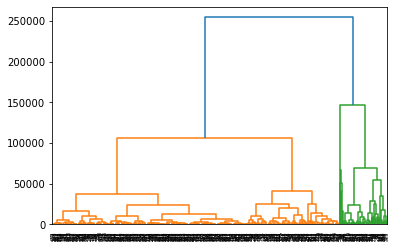

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [11]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([1, 1, 1, 3, 1, 1, 3, 1, 3, 4, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3,
       3, 2, 1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 3, 1, 4,
       1, 2, 4, 0, 1, 2, 3, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 0, 1, 4, 3, 2,
       3, 1, 1, 3, 3, 4, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1,
       3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 4, 1, 3, 3, 3, 1, 4, 1, 2,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 4, 1, 3, 1, 1, 1, 3, 3, 2, 1, 4, 1, 3, 3, 3, 1, 2, 1, 4, 3, 1,
       1, 1, 1, 3, 1, 2, 1, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 4, 3, 1, 1, 1,
       3, 3, 4, 2, 1, 3, 3, 4, 3, 1, 3, 4, 3, 2, 3, 1, 1, 4, 2, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       4, 2, 4, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1,

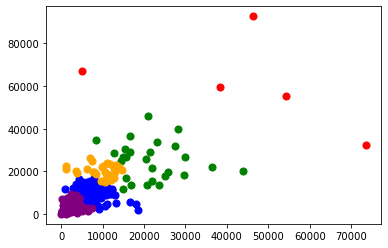

In [12]:
# scatterplots with specific colors
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [14]:
# cluster based on more features

# Normalize the data
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [15]:
# Cluster based on six features
X = dataset.iloc[:, [2, 3, 4, 5, 6, 7]].values
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

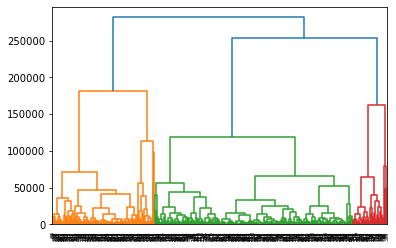

In [16]:
# create dendrogram (might take a while)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [17]:
# six clusters
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([5, 5, 5, 3, 1, 5, 3, 5, 3, 4, 5, 3, 1, 1, 1, 3, 5, 3, 1, 5, 1, 3,
       1, 5, 1, 1, 3, 1, 4, 0, 1, 3, 1, 1, 3, 5, 1, 5, 4, 0, 1, 1, 5, 4,
       5, 4, 4, 2, 5, 4, 3, 3, 0, 5, 1, 3, 4, 5, 1, 5, 5, 2, 5, 5, 3, 4,
       3, 1, 3, 3, 1, 1, 3, 1, 5, 1, 3, 4, 3, 3, 3, 5, 5, 1, 3, 2, 2, 0,
       3, 1, 3, 3, 4, 3, 5, 3, 3, 3, 3, 3, 5, 5, 5, 0, 1, 1, 5, 5, 3, 4,
       3, 5, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 5, 0, 0, 1, 1, 3, 0, 3, 3,
       1, 3, 3, 3, 5, 3, 3, 3, 1, 1, 1, 3, 1, 4, 3, 3, 3, 1, 1, 3, 1, 3,
       3, 4, 5, 1, 5, 5, 5, 1, 1, 4, 5, 5, 5, 3, 3, 3, 5, 4, 3, 4, 3, 5,
       0, 5, 5, 3, 1, 0, 5, 0, 3, 3, 3, 5, 5, 5, 1, 1, 3, 4, 3, 1, 1, 5,
       3, 3, 4, 4, 1, 3, 3, 4, 3, 3, 3, 4, 1, 4, 3, 5, 5, 5, 4, 1, 5, 3,
       1, 5, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 0, 1, 1,
       1, 3, 5, 5, 3, 1, 1, 3, 3, 4, 3, 1, 5, 1, 5, 3, 0, 0, 3, 3, 1, 3,
       5, 5, 4, 1, 5, 1, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 5, 0, 1, 0, 0,
       3, 1, 1, 0, 3, 3, 3, 5, 1, 3, 1, 5, 5, 3, 1,

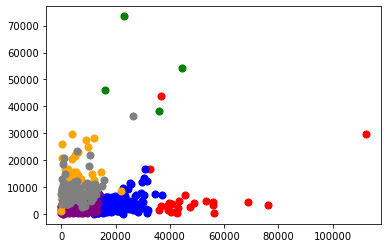

In [18]:
# scatterplots with specific colors
# not sure which features are represented in the x and y axis?
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='gray')
plt.show()